# Praca Domowa 7
Piotr Sieńko 

## Wczytanie danych i ich przekształcenie

In [11]:
import numpy as np
from sklearn.decomposition import PCA
from skimage import io
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Tworzę funkcję, która umożliwi szybkie wywoływanie obrazków

In [2]:
def showpics(pic_1, pic_2):
    fig = plt.figure(figsize=(16, 8))
        
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(pic_1)    
    ax.axis('off')

    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(pic_2)
    ax.axis('off')

    plt.show()

Wczytuję dwa badane obrazki

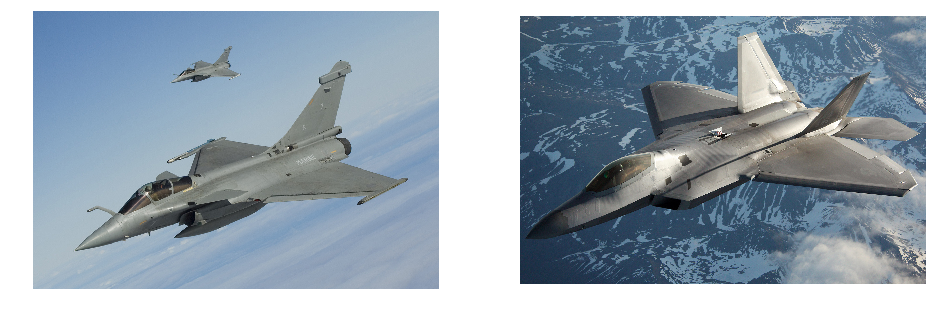

In [3]:
pic_1 = io.imread('Raf.jpg')
pic_2 = io.imread('F22.jpg')

showpics(pic_1, pic_2)

Obrazek na lewo przedstawia parę myśliwców Dassault Rafale M, natomiast po prawej mamy samolot Lockheed F-22A Raptor. Poza samymi maszynami, obrazki różnią się także rozmiarami i tłem, co będzie miało wpływ na wynik kompresji.

In [4]:
# Obrazki są zapisane w 3 wymiarowej macierzy. Konieczne jest więc przekształcenie macierzy w 2 wymiary
print(pic_1.shape)
print(pic_2.shape)

(819, 1196, 3)
(1055, 1598, 3)


Widzimy, że zdjęcie Raptora jest w wyższej rozdzielczości.

Przed zastosowaniem PCA musimy jeszcze przekształcić nasze dane do postaci dwuwymiarowej

In [5]:
pic_1 = np.reshape(pic_1, (pic_1.shape[0], pic_1.shape[1] * pic_1.shape[2]))
pic_2 = np.reshape(pic_2, (pic_2.shape[0], pic_2.shape[1] * pic_2.shape[2]))
print(pic_1.shape)
print(pic_2.shape)

(819, 3588)
(1055, 4794)


## PCA - dobór liczby komponentów

Postanowiłem przeprowadzić kompresję z użyciem PCA w dwóch wersjach. Z ograniczoną liczbą składowych, co umożliwi drastyczne zmniejszenie rozmiaru pliku, oraz z większą ich liczbą, co powinno zachować akceptowalną jakość zdjęć. Aby dobrać liczbę komponentów, stworzyłem wykres przedstawiający odsetek wyjaśnionej wariancji w zależności od liczby użytych składowych. 

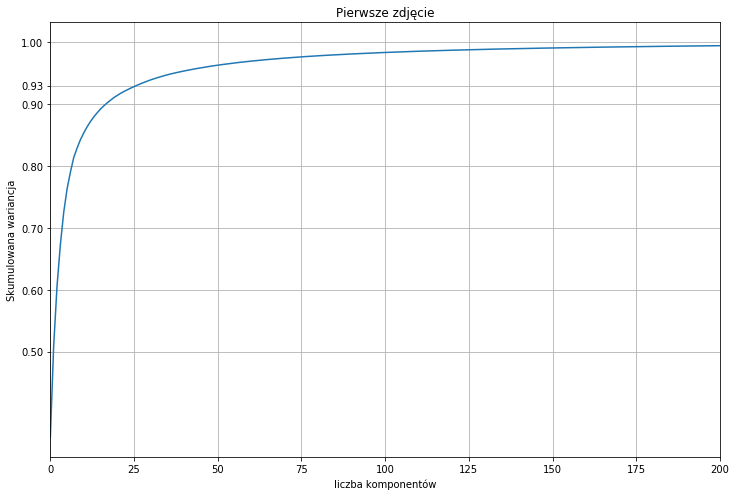

In [6]:
pca = PCA(random_state=0).fit(pic_1)
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,200)
plt.grid()
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 0.93, 1.0])
plt.ylabel('Skumulowana wariancja')
plt.xlabel('liczba komponentów')
plt.title("Pierwsze zdjęcie")
plt.show()


W wynikach dla pierwszego obrazka widać, że 25 głównych składowych wyjaśnia około 93% procent wariancji. Dla 200 komponentów odsetek ten jest już bardzo blisko 100%.

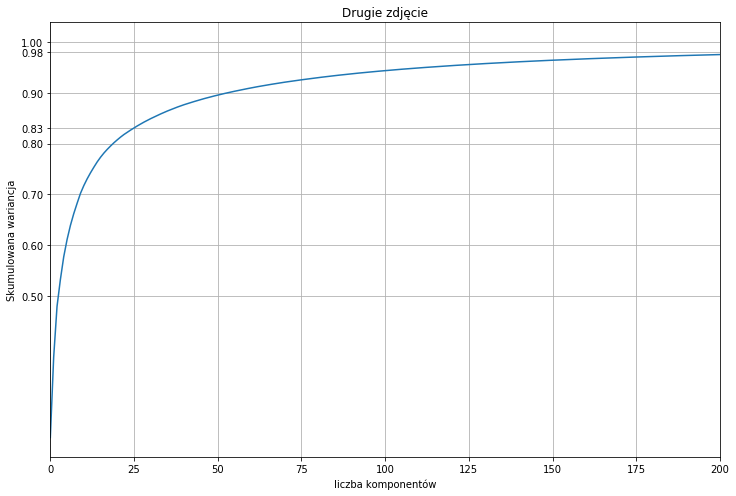

In [7]:
pca = PCA(random_state=0).fit(pic_2)
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,200)
plt.grid()
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.83, 0.9, 0.98, 1.0])
plt.ylabel('Skumulowana wariancja')
plt.xlabel('liczba komponentów')
plt.title("Drugie zdjęcie")
plt.show()

Drugi obrazek jest większy i bardziej szczegółowy, co powoduje, iż 25 składowych o największej wariancji wyjaśnia jedynie 83% wariancji. Dla 200 komponentów jest to już ponad 97%. Uznałem, że są to odpowiednie wartości do sprawdzenia w jaki sposób liczba składowych wpłynie na wielkość i jakość obrazu. Dodatkowo, użycie takiej samej liczby komponentów dla PCA umożliwi porównanie złożoności obu zdjęć.

## PCA - kompresja obrazu

Na początku zdefiniowałem funkcję, która wypisuje wartości przed kompresją, dokonuje redukcji, a następnie znów podaje rozmiar zdjęć.

In [8]:
def PCA_red_and_inverse(pic):
    
    print("Wielkość obrazka przez kompresją -> ", pic.size)
    print("Wymiar obrazka przed kompresją -> ", pic.shape)
    print("")
    
    # Dokonujemy redukcji dla 25 komponentów
    pca_1 = PCA(n_components = 25, random_state=0).fit(pic)
    red_1 = pca_1.transform(pic)
    
    print("Wielkość obrazka przy n = 25 -> ", red_1.size)
    print("Wymiar obrazka przy n = 25 -> ", red_1.shape)
    print("")

    # Dokonujemy redukcji dla 200 komponentów
    pca_2 = PCA(n_components = 500, random_state=0).fit(pic)
    red_2 = pca_2.transform(pic)
    
    print("Wielkość obrazka przy n = 200 -> ", red_2.size)
    print("Wymiar obrazka przy n = 200 -> ", red_2.shape)
    print("")
    
    red_1 = pca_1.inverse_transform(red_1)
    red_2 = pca_2.inverse_transform(red_2)

    # Zwracam zdekompresowaną macierz, utworzoną na podstawie składowych PCA
    return red_1, red_2

# Wywołanie dla pierwszego obrazka    
pic_1_1, pic_1_2 = PCA_red_and_inverse(pic_1)

Wielkość obrazka przez kompresją ->  2938572
Wymiar obrazka przed kompresją ->  (819, 3588)

Wielkość obrazka przy n = 25 ->  20475
Wymiar obrazka przy n = 25 ->  (819, 25)

Wielkość obrazka przy n = 200 ->  409500
Wymiar obrazka przy n = 200 ->  (819, 500)



Dla pierwszego obrazka, kompresja do 25 składowych dała ponad 140-krotne zmniejszenie rozmiaru. Dla 200 komponentów było to już "jedynie" 7-krotne pomniejszenie. 

In [9]:
# Wywołanie dla drugiego obrazka
pic_2_1, pic_2_2 = PCA_red_and_inverse(pic_2)

Wielkość obrazka przez kompresją ->  5057670
Wymiar obrazka przed kompresją ->  (1055, 4794)

Wielkość obrazka przy n = 25 ->  26375
Wymiar obrazka przy n = 25 ->  (1055, 25)

Wielkość obrazka przy n = 200 ->  527500
Wymiar obrazka przy n = 200 ->  (1055, 500)



W przypadku drugiego zdjęcia, redukcja obrazu poskutkowała 190 i 9-krotnym zmniejszeniem jego rozmiaru przy odpowiednio 25 i 200 składowych.

## Analiza Wyników

W celu porównania efektywności kompresji obrazu, postanowiłem ponownie wyświetlić oba zdjęcia.

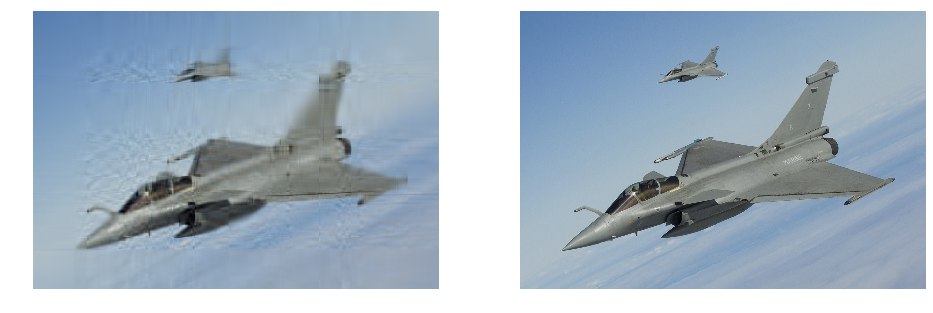

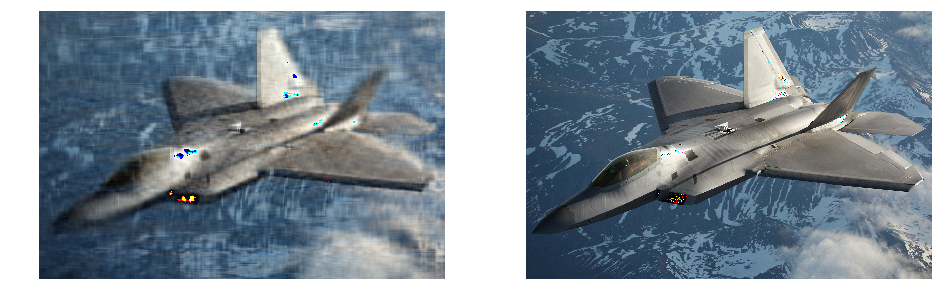

In [10]:
pic_1_1 = np.reshape(pic_1_1, (819, 1196, 3))
pic_1_2 = np.reshape(pic_1_2, (819, 1196, 3))

pic_2_1 = np.reshape(pic_2_1, (1055, 1598, 3))
pic_2_2 = np.reshape(pic_2_2, (1055, 1598, 3))

# zmiana kodowania
showpics(pic_1_1.astype(np.uint8), pic_1_2.astype(np.uint8))
showpics(pic_2_1.astype(np.uint8), pic_2_2.astype(np.uint8))

Wybór niskiej liczby głównych składowych pozwolił na znaczące zmniejszenie wielkości zdjęć. Z drugiej strony, strata jakości obrazu jest bardzo duża. Oba zdjęcia są zaszumione, dodatkowo na dolnym obrazku są widoczne duże skupiska "martwych pikseli". Przy 200 komponentach zdjęcie samolotu Rafale jest już niemal identyczne z oryginałem. W przypadku Raptora również zaszła znaczna poprawa jakości. Górskie tło zostało odtworzone bardzo dokładnie, nie występuje już zaszumienie. Niestety, na samolocie nadal widać punkty o kolorze kompletnie różnym od otoczenia. Zgodnie z intuicją, możemy więc sformułować tezę, że obrazy bardziej szczegółowe, o większej liczbie wyróżniających się elementów potrzebują odpowiednio podwyższonej liczby składowych, by zachować jakość obrazu.